In [1]:
from py2neo import Graph
from py2neo import Node

import pandas as pd
from matplotlib import pyplot as plt

In [2]:
from py2neo import Database
db = Database("bolt://disease.ncats.io:80")

In [3]:
graph = db.default_graph

In [4]:
disease_q = """MATCH p=(d:DATA)--(n:S_GARD)<-[r:R_subClassOf]-(s:S_GARD)
            RETURN d.id, n.N_Name, count(s)"""
disease_dict = graph.run(disease_q).data()

In [6]:
dis_df = pd.DataFrame.from_dict(disease_dict)
dis_df.head()

,d.id,n.N_Name,count(s)
0,6,"[ACROMESOMELIC DYSPLASIA, ACROMESOMELIC DWARFISM]",5
1,37,[PARTIAL DELETION OF THE SHORT ARM OF CHROMOSO...,1
2,76,"[HYPOHIDROTIC ECTODERMAL DYSPLASIA, HED, ECTOD...",4
3,85,"[THANATOPHORIC DYSPLASIA, DWARFISM THANATOPHOR...",2
4,101,CENTRONUCLEAR MYOPATHY,4


In [7]:
print(dis_df.shape)

(420, 3)


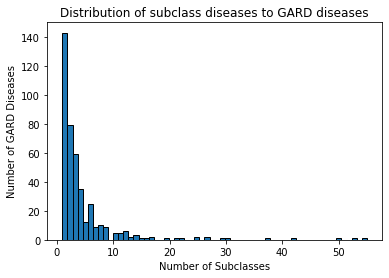

In [11]:
plt.hist(dis_df["count(s)"], bins=60, ec = "black")
plt.xlabel("Number of Subclasses")
plt.ylabel("Number of GARD Diseases")
plt.title("Distribution of subclass diseases to GARD diseases")
plt.show()

In [12]:
dis_df.sort_values(by="count(s)", ascending=False)

,d.id,n.N_Name,count(s)
94,6034,"[CHARCOT-MARIE-TOOTH DISEASE, CMT, HEREDITARY ...",55
121,6614,HEREDITARY ATAXIA,53
109,6317,ECTODERMAL DYSPLASIA,50
221,10307,"[CONGENITAL DISORDERS OF GLYCOSYLATION, CDG, C...",42
233,10748,"[SPINOCEREBELLAR ATAXIA, SCA]",37
...,...,...,...
129,6768,IMMUNE THROMBOCYTOPENIA,1
305,12162,REDUCING BODY MYOPATHY,1
128,6735,HYPOPHOSPHATEMIC RICKETS,1
309,12210,BLADDER CANCER,1


In [13]:
phenotype_q = """MATCH p=(d:DATA)--(n:S_HP)<-[r:R_subClassOf]-(s:S_HP)
            RETURN d.id, n.N_Name, count(s)"""
phenotype_dict = graph.run(phenotype_q).data()

In [14]:
phen_df = pd.DataFrame.from_dict(phenotype_dict)
phen_df.head()

,d.id,n.N_Name,count(s)
0,HP:0001019,"[EXFOLIATIVE DERMITITIS, GENERALIZED ERYTHRODE...",2
1,HP:0100731,"[TESSIER FACIAL CLEFT NUMBER 6, TESSIER FACIAL...",3
2,UBERON:0001970,"[GALL, FEL, BILE]",6
3,HP:0011547,ABSENT LEFT SIDED ATRIOVENTRICULAR CONNECTION,6
4,HP:0010112,"[CENTRAL POLYDACTYLY OF FEET, MESOAXIAL FOOT P...",6


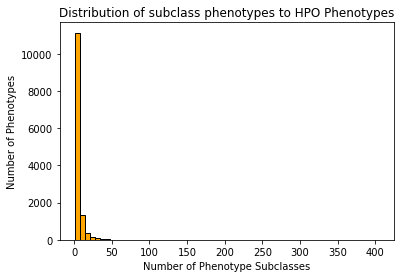

In [18]:
plt.hist(phen_df["count(s)"], bins=60, ec = "black", facecolor = "orange")
plt.xlabel("Number of Phenotype Subclasses")
plt.ylabel("Number of Phenotypes")
plt.title("Distribution of subclass phenotypes to HPO Phenotypes")
plt.show()

In [19]:
phen_df.sort_values(by="count(s)", ascending=False)

,d.id,n.N_Name,count(s)
2450,http://purl.obolibrary.org/obo/CARO_0000000,ANATOMICAL ENTITY,405
11676,UBERON:0004120,"[MESODERMAL DERIVATIVE, MESODERM-DERIVED STRUC...",316
1223,UBERON:0010314,STRUCTURE WITH DEVELOPMENTAL CONTRIBUTION FROM...,260
11746,NCBITaxon:9606,"[HUMAN, MAN, HUMANS, HOMO SAPIENS]",214
7674,UBERON:0000061,"[CONNECTED BIOLOGICAL STRUCTURE, BIOLOGICAL ST...",211
...,...,...,...
10111,GO:0006518,"[PEPTIDE METABOLISM, PEPTIDE METABOLIC PROCESS]",1
4994,MGI:97489,PAX5 (MOUSE),1
4993,UBERON:0035431,"[PARS MEDIASTINALIS (PLEURAE), PARS MEDIASTINA...",1
4992,CHEBI:33767,"[COBALT GROUP MOLECULAR ENTITY, COBALT GROUP M...",1
